In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-german-grandprix-2019-race-day-data/race_classification_germanGp-2019.csv


In [70]:
german_gp = pd.read_csv('/kaggle/input/formula-1-german-grandprix-2019-race-day-data/race_classification_germanGp-2019.csv')
german_gp.head()

,STARTING_POSITION,CAR_NO,NAME,TEAM,NATIONALITY,QUALIFY_TIME,RACE_PLACE,PLACES_GAINED,LAPS_COMPLETED,TIME,SECTOR1,SECTOR2,SECTOR3,FASTEST_LAP,PIT_STOPS,TOTAL_PIT_TIME,POINTS
0,1,44,Lewis Hamilton,Mercedes Amg Petronas Motorsport,Britain,1.11.767,9,-8,64,1.44.50.942,17.004,36.501,23.384,1.17.485,6,02:58.9,2
1,2,33,Max Verstappen,Aston Martin Redbull Racing,Netherland,1.12.113,1,1,64,1.44.31.275,16.835,36.434,23.295,1.16.645,5,01:41.9,26
2,3,77,Valteri Bottas,Mercedes Amg Petronas Motorsport,Finland,1.12.129,0,-20,56,1.32.18.527,17.172,36.782,24.121,1.18.272,4,01:24.9,0
3,4,10,Pierre Gasly,Aston Martin Redbull Racing,France,1.12.522,0,-20,61,1.40.47.673,16.878,36.449,23.636,1.17.595,4,01:30.1,0
4,5,7,Kimi Raikkonen,Alfa Romeo Racing,Finland,1.12.538,12,-7,64,1.45.13.489,17.056,36.196,23.919,1.17.746,4,01:31.6,0


In [71]:
german_gp.tail(5)

,STARTING_POSITION,CAR_NO,NAME,TEAM,NATIONALITY,QUALIFY_TIME,RACE_PLACE,PLACES_GAINED,LAPS_COMPLETED,TIME,SECTOR1,SECTOR2,SECTOR3,FASTEST_LAP,PIT_STOPS,TOTAL_PIT_TIME,POINTS
15,16,23,Alexander Albon,Scuderia Toro Rosso,Thailand,1.13.461,6,10,64,1.44.41.327,16.905,36.465,23.899,1.17.850,4,01:23.7,8
16,17,63,George Russel,Willaims Racing,Britain,1.14.721,11,6,64,1.44.57.679,17.443,37.445,24.392,1.19.3,4,01:21.0,0
17,18,88,Robert Kubica,Willaims Racing,Poland,1.14.839,10,8,64,1.44.56.262,17.437,37.319,24.428,1.19.563,5,01:44.1,1
18,19,4,Lando Norris,Mclaren F1 Team,Britain,1.13.333,0,-20,25,41.19.490,19.870,41.398,28.970,1.31.081,2,41.644,0
19,20,5,Sebastian Vettel,Scuderia Ferrari,Germany,0.00.000,2,18,64,1.44.38.608,16.838,35.997,23.765,1.16.794,5,01:43.8,18


In [72]:
pd.set_option('display.max_columns',None)
german_gp.head()

,STARTING_POSITION,CAR_NO,NAME,TEAM,NATIONALITY,QUALIFY_TIME,RACE_PLACE,PLACES_GAINED,LAPS_COMPLETED,TIME,SECTOR1,SECTOR2,SECTOR3,FASTEST_LAP,PIT_STOPS,TOTAL_PIT_TIME,POINTS
0,1,44,Lewis Hamilton,Mercedes Amg Petronas Motorsport,Britain,1.11.767,9,-8,64,1.44.50.942,17.004,36.501,23.384,1.17.485,6,02:58.9,2
1,2,33,Max Verstappen,Aston Martin Redbull Racing,Netherland,1.12.113,1,1,64,1.44.31.275,16.835,36.434,23.295,1.16.645,5,01:41.9,26
2,3,77,Valteri Bottas,Mercedes Amg Petronas Motorsport,Finland,1.12.129,0,-20,56,1.32.18.527,17.172,36.782,24.121,1.18.272,4,01:24.9,0
3,4,10,Pierre Gasly,Aston Martin Redbull Racing,France,1.12.522,0,-20,61,1.40.47.673,16.878,36.449,23.636,1.17.595,4,01:30.1,0
4,5,7,Kimi Raikkonen,Alfa Romeo Racing,Finland,1.12.538,12,-7,64,1.45.13.489,17.056,36.196,23.919,1.17.746,4,01:31.6,0


In [73]:
german_gp.shape

(20, 17)

In [82]:
print(german_gp.columns)

Index(['startingposition', 'carnumber', 'driver', 'team', 'nationality',
       'qualifytime', 'position', 'placesgained', 'laps', 'time', 'sector1',
       'sector2', 'sector3', 'fastestlap', 'pitstops', 'totalpittime',
       'points', 'status'],
      dtype='object')


As the above code line threw a "'_s_t_a_r_t_i_n_g___p_o_s_i_t_i_o_n_', '_c_a_r___n_o_', '_n_a_m_e_', ..."
*First We need to join the letters and further clean*

In [ ]:
german_gp.columns = [''.join(col.split('_')).lower() for col in german_gp.columns]

In [85]:
print("Cleaned columns : ", german_gp.columns)

Cleaned columns :  Index(['startingposition', 'carnumber', 'driver', 'team', 'nationality',
       'qualifytime', 'position', 'placesgained', 'laps', 'time', 'sector1',
       'sector2', 'sector3', 'fastestlap', 'pitstops', 'totalpittime',
       'points', 'status'],
      dtype='object')


In [87]:
german_gp.rename(columns={
    'carno': 'car_number',
    'name': 'driver',
    'raceplace': 'position',
    'lapscompleted': 'laps',
    'team': 'team'
}, inplace=True)

In [88]:
print("Renamed columns:", german_gp.columns)

Renamed columns: Index(['startingposition', 'carnumber', 'driver', 'team', 'nationality',
       'qualifytime', 'position', 'placesgained', 'laps', 'time', 'sector1',
       'sector2', 'sector3', 'fastestlap', 'pitstops', 'totalpittime',
       'points', 'status'],
      dtype='object')


We are introducing a new 'status' column based on the laps completed by the driver (does include DNF)

In [92]:
max_laps = german_gp['laps'].max()
german_gp['status'] = german_gp['laps'].apply(lambda x: 'Finished' if x == max_laps else 'DNF')

For positions

In [93]:
german_gp['position']=german_gp['position'].replace(0,pd.NA)
german_gp['position']=pd.to_numeric(german_gp['position'],errors='coerce')
german_gp['lap']=pd.to_numeric(german_gp['laps'],errors='coerce')

Introducing more 'features'

In [94]:
german_gp['did_finish'] = german_gp['status'] == 'Finished'
german_gp['is_dnf'] = ~german_gp['did_finish']
german_gp['was_lapped'] = german_gp['laps'] < max_laps

Preview of Top 10 Finishers/Qualifiers

In [95]:
german_gp_sorted = german_gp.sort_values('position')
ggs = german_gp_sorted[['driver','team','position','status']].head(10)
print(ggs)

              driver                              team  position    status
1     Max Verstappen       Aston Martin Redbull Racing       1.0  Finished
19  Sebastian Vettel                  Scuderia Ferrari       2.0  Finished
13       Danil Kvyat               Scuderia Toro Rosso       3.0  Finished
14      Lance Stroll              Racing Point F1 Team       4.0  Finished
6       Carlos sainz                   Mclaren F1 Team       5.0  Finished
15   Alexander Albon               Scuderia Toro Rosso       6.0  Finished
5    Romain Grosjean                      Hass F1 Team       7.0  Finished
11   Kevin Magnussen                      Hass F1 Team       8.0  Finished
0     Lewis Hamilton  Mercedes Amg Petronas Motorsport       9.0  Finished
17     Robert Kubica                   Willaims Racing      10.0  Finished


For DNF Count

In [97]:
dnf=german_gp['is_dnf'].sum()
print(f"DNFs in the race : {dnf}/{len(german_gp)}")

DNFs in the race : 7/20


Visual Analysis

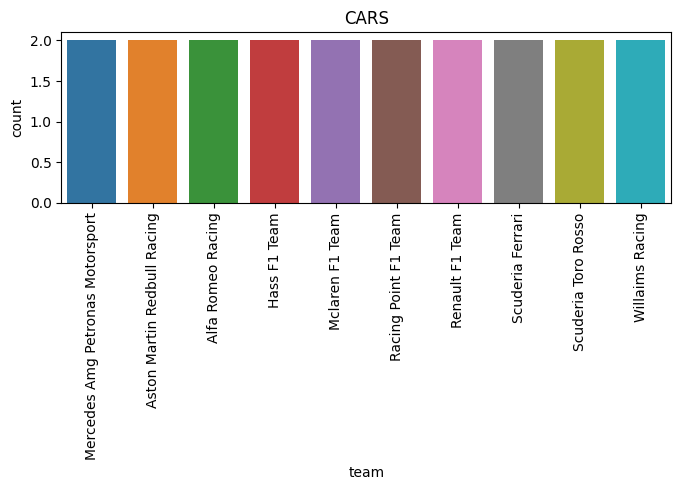

In [111]:
plt.figure(figsize=(7,5))
sns.countplot(data=german_gp, x='team', order=german_gp['team'].value_counts().index)
plt.title("CARS")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


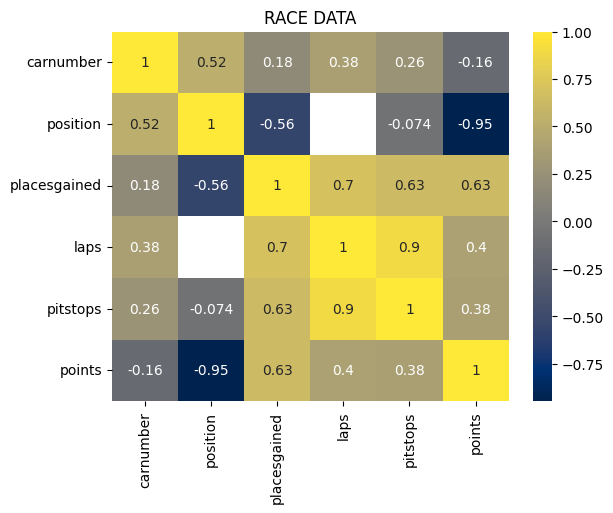

In [120]:
sns.heatmap(german_gp[['carnumber', 'position', 'placesgained', 'laps', 'pitstops', 'points']].corr(), annot=True, cmap='cividis') #color blind friendly cmap
plt.title('RACE DATA')
plt.show()

In [121]:
le_driver=LabelEncoder()
le_team=LabelEncoder()
german_gp['driver_encoded'] = le_driver.fit_transform(german_gp['driver'])
german_gp['team_encoded'] = le_team.fit_transform(german_gp['team'])

In [125]:
german_gp['top5'] = german_gp['position']<=5

In [127]:
features=['carnumber','driver_encoded','team_encoded','laps']
german_gpml=german_gp.dropna(subset=features+['top5'])

In [130]:
y= german_gpml['top5']
X=german_gpml[features]

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [137]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [138]:
print(f'Model Accuracy :{model.score(X_test,y_test)*100:.2f}%')

Model Accuracy :50.00%


In [141]:
kmeans=KMeans(n_clusters=3, random_state=42,n_init=10)
german_gpml['cluster']=kmeans.fit_predict(X)

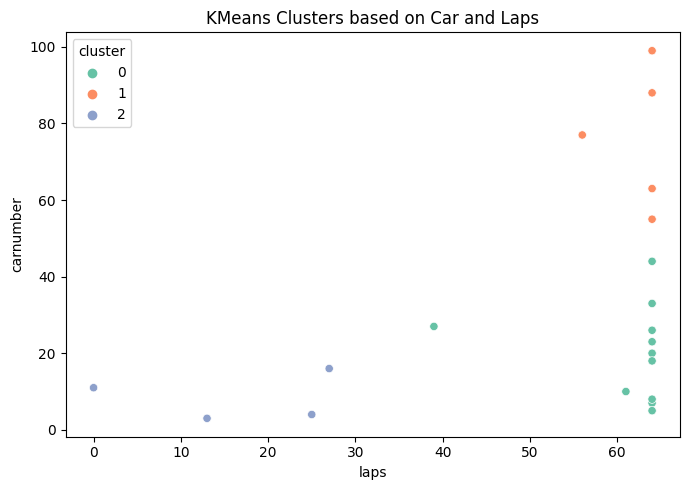

In [146]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=german_gpml, x='laps', y='carnumber', hue='cluster', palette='Set2')
plt.title("KMeans Clusters based on Car and Laps")
plt.tight_layout()

plt.show()
